In [100]:
#work flow for machine learning

#1. 데이터 분류 -> human's work
#2. 연관성 찾기 -> 입력값과 예측값의 연관성을 파악한 후 기계에 넣을 자료 정제
#3. 텍스트 변환 -> 데이터를 숫자로 변환
#4. 빠진값 보완 -> 비어있는 데이터 보완
#5. 차트 만들기 -> 도표를 그려 데이터 한눈에 보기
#6.  모델 제출  -> 만들어진 모델 제출 만들어진 알고리즘을 따라 결과값 확인.

In [101]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

#머신러닝 툴
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [102]:
# 세트 두개 불러오기
# 패널 데이터 분석 도구로 불러오기.

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
def age_rounding(age):
    if age <=1:
        return 1
    else:
        return age
    
train.Age = train.Age.apply(age_rounding)



In [103]:
def aging(Age):
    if 0<=Age<=5:
        return 5
    elif 6<=Age<=15:
        return 10
    elif 16<=Age<=20:
        return 20
    elif 21<=Age<=25:
        return 25
    elif 26<=Age<=35:
        return 30  
    elif 36<=Age<=45:
        return 40
    elif 46<=Age<=55:
        return 50
    elif 56<=Age<=65:
        return 60
    elif 66<=Age:
        return 70

In [104]:
df = train[['Survived','Age','Pclass']]
df['idx'] = 1
df['Age'] = df['Age'].apply(aging)
# df
# train_age = train.groupby('Age')
# train_age.groups
df_1 = df.query('Pclass==1')
df_1 = df_1.groupby('Age').sum()
# df_1 = df_1[['Survived','idx']]
df_1['SpA']  = df_1['Survived']/df_1['idx']
df_1['Pclass'] =  df_1['Pclass']/df_1['idx']

df_2 = df.query('Pclass==2')
df_2 = df_2.groupby('Age').sum()
# df_2 = df_2[['Survived','idx']]
df_2['SpA']  = df_2['Survived']/df_2['idx']
df_2['Pclass'] =  df_2['Pclass']/df_2['idx']

df_3 = df.query('Pclass==3')
df_3 = df_3.groupby('Age').sum()
# df_3 = df_3[['Survived','idx']]
df_3['SpA']  = df_3['Survived']/df_3['idx']
df_3['Pclass'] =  df_3['Pclass']/df_3['idx']




result = pd.concat([df_1,df_2,df_3]).reset_index()
result = result.sort_values('Age')


<ipython-input-104-6ea9495fcf7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['idx'] = 1
<ipython-input-104-6ea9495fcf7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(aging)


In [105]:



# passenger Id : 승객번호 // sex : 성별 // Age : 나이 // SibSp : 같이 승선한 가족수
# Ticket : 표 이름 ( 단순 이름으로 중요하지 않음 )
# Fare : 요금 -> 비싼 티켓값과의 연관관계 확인해 볼 필요 있음.
# Cabin : 객실 // Pclass : 객실 등급 (Fare 과 연관되어 좋은 객실과 연결 될 것)
# Embarked : 탑승 위치
# train csv 에서는 11개의 column 이 있음.  test 에서는 survived 가 빠진 10개가 있음


In [106]:
train.info()
print('-'*100)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtyp

In [107]:
# 데이터의 양은 훈련 > 테스트 일것
# 훈련세트엔 891개 entry , 12 column 존재
# test 엔 418 개 entry , 11 column 존재
train.isnull().sum()

# 빠진 값 : 나이 177개 , 객실 687개, 탑승지 2개
#자료를 알아보기 위해 컬럼 분류

#손가락으로 셀 수 있는 범위가 나와있는 cartegorical(엑셀처럼 나오니 간단히 파악) / numeric (시각화 자료를 통해 파악해야 함)
# 데이터의 양은 훈련 > 테스트 일것
# 훈련세트엔 891개 entry , 12 column 존재
# test 엔 418 개 entry , 11 column 존재
train.isnull().sum()

# 빠진 값 : 나이 177개 , 객실 687개, 탑승지 2개
#자료를 알아보기 위해 컬럼 분류


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
#손가락으로 셀 수 있는 범위가 나와있는 cartegorical(엑셀처럼 나오니 간단히 파악) / numeric (시각화 자료를 통해 파악해야 함)
# describe 설명해줘 기계야!
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.701681,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.521395,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
# 1. 총 2,224명 중 훈련샘플은 891개 이다 -> 총 데이터 중 40%가 제공됨.
# 2. 살았는지 죽었는지는 1 과 0으로 구분
# 3. 타이타닉 실제 생존률은 32% 이다. -> describe 의 평균 생존률은 38%로 제공됨. -> 실제 데이터가 아닌 훈련용 데이터임.
# 4. Parch 항목 보면 max 0~75% 는 0이다? -> 0 = 혼자탐 -> 혼자 탄 사람이 75% 이상이다.
# 5. SibSp 항목 75% 이상의 값은 1인데 MAX 값에 몰려있다 -> 형제 자매 배우자와 같이 탄 사람. 
# 6. 나이 항목 : 최소 0.42 최대 80 이지만, 평균 28세정도이다 -> 젊은 편
# 7. Pclass : 50% 이상이 3등선실에 타고있다.


In [110]:
# 글자로 된 데이터 보기
# 글자 -> object 포함 include->
train.describe(include='O')

# 동명이인이 없다는 사실을 알 수 있음.
# 21세기에는 여러 성별이 존재하지만 사고 당시에는 딱 2개의 성별.
# top-sex  : male  남자가 더 많이 탔다 // freq 값이 577로 남자가 577명이다.
# Cabin 객실 값을 보자하니, 일반적으로 생각해보면 모든 승객은 1인실을 탈 수 없음. -> 객실 공유는 필수불가결 친구끼리의 객실 이름은 같을 것.
# 즉 대체적으로 승객들은 같은 객실에 탔을 확률이 높았다.
# 승선지는 S 에서 탄 사람이 가장 많다. 644명
# unique row 는 내생각엔 변수의 수라고 보여짐. sex 2개 Embarked 3개 등.
# top 은 최고로 꼽힌 값(최대값) freq 은 top 값의 수 male - 577 // s - 644


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Watson, Mr. Ennis Hastings",male,1601,B96 B98,S
freq,1,577,7,4,644


In [111]:
# 데이터 의미 파악 끝.

#survived 값을 더 정확하게 파악하기 위해 데이터 엔지니어링을 해보고자 함.
#데이터들을 응용하여 가정을 세울 필요가 있음. 연관성을 통해 가정을 세우고 테스팅 해보는 것.


In [112]:
# 1. 돈을 많이 낸 사람은 많이 생존했을까 ?
# 1-1. 돈을 많이 낸 사람 (Fare 값이 높은 객체)/ Pclass 에 따라 생존률이 나뉘는가?
# 생존률은 평균 mean 값이니 mean값 적용.
# 그룹바이 사용 // 평균값을 보여주고 생존에따라서 솎아내라


In [113]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
# Pclass/ Survived
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

# train 의 Pclass와Survived 가지고 gruopby 나와. 그리고 Pclass 써. 그리고 평균값(mean) 구해. 그리고 정리해 Survived 값을 따라서
# Pclass 가 인덱스로 들어가버림 -> as_index = False 이걸 넣으면 됨. ascending = False 오름차순 false

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [115]:
"""
### 결과값 분석 ####
확인해 본 결과 1등실 생존률이 63%로 확.실.히 높았다. (Fare 값도 높았을 것)
그렇다고 결론을 돈 많이 냄 -> 생존률의 무조건적인 증가 ---->>> 절대아니다
머신러닝을 통해 우리는 단순히 결과값을 예측만 한다. 그 이후의 조사는 다른 전문가가 할 것
3등선실은 돈을 적게내서 죽었나? 이 또한 절대 아니다. 
위의 내용이 절대 안된다고 한 이유는 돈을 적게 내서가 아닌 3등선실이 구조적으로 탈출이 어려웠을 수 있음
"""


'\n### 결과값 분석 ####\n확인해 본 결과 1등실 생존률이 63%로 확.실.히 높았다. (Fare 값도 높았을 것)\n그렇다고 결론을 돈 많이 냄 -> 생존률의 무조건적인 증가 ---->>> 절대아니다\n머신러닝을 통해 우리는 단순히 결과값을 예측만 한다. 그 이후의 조사는 다른 전문가가 할 것\n3등선실은 돈을 적게내서 죽었나? 이 또한 절대 아니다. \n위의 내용이 절대 안된다고 한 이유는 돈을 적게 내서가 아닌 3등선실이 구조적으로 탈출이 어려웠을 수 있음\n'

In [116]:
# 성별에 따른 생존률 비교 // 성별에 따라 생존률이 차이를 보이는가??

train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [117]:
"""
#### 결과값 분석 ####
# 여성 중 74% 생존 , 남성 중 18% 생존
# 여기서 생존률이 큰 차이를 보인 이유는 영국이 과거 이와 비슷한 일이 있었음
# 과거 군인 수송 배가 가라앉을 때 군인들은 민간인을 먼저 구조시키고 자신들은 침몰됨. 
# 따라서 이들에겐 어린아이와 노인, 여성을 우선 대피시키는 프로토콜이 존재함.
""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-117-500acf1efecf>, line 7)

In [248]:
# 나이에 따른 생존률 분석

#SibSp 와 Parch 항목을 봅시다.
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [249]:
### 결과값 분석 ####
# 결과 -> 가족 한명과 같이 탄 사람들의 생존률이 가장 높았다.
# 가족이 많이 탄 경우 ( 5명, 8명 ) -> 사람 여러명이 같이 탈 경우 생존률이 줄어듬 (오류!) -> 데이터 표본값이 적기때문


In [250]:
# 분석한 데이터를 근거로 시각화 visualization 를 해봅시다. 연속형 - numeric 데이터
# 시각화 ( 도표를 그려서 파악한다 )
# 왜 그리느냐, 결과값과의 연관성 파악을 위함.

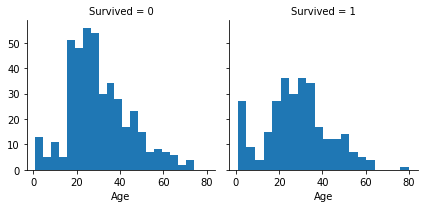

In [251]:
# 생존자와 사망자 ( survived )를 왼쪽 오른쪽으로 나눠서 그리는 도표
graph = sns.FacetGrid(train,col='Survived')

# 그린다 -> mapping 한다
graph.map(plt.hist,'Age',bins=20)
# hist -> 막대그래프

In [252]:
"""
히스토그램은 연속적 숫자 데이터를 파악하는 데 큰 도움이 됨.
위와같이 탑승객 중 나이에 따른 생존률이 큰 차이를 보이는가? 에 대한 질문을 쉽게 파악 가능
20세 언저리의 승객들이 많이 사망. 대다수의 승객이 15~35세 사이에 몰려있다.
나이는 numeric 데이터 -> 밴드로 묶는다면 범위가 좁혀짐
 예를 들어 0-10세는 1, 11-30은 2 와 같이
"""

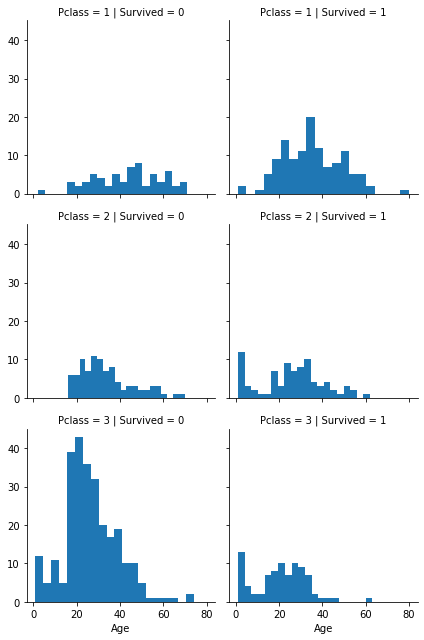

In [253]:

"""
가정에서 확인했듯이, 3등선실의 사람들이 1,2등 선실의 사람들보다 많이 사망했음.
각 선실별로 탑승객들의 나이는 다를것임. 따라서 나눠서 생각해보자
각 1,2,3 등 선실을 나누고, 나이로 나누고, 생존여부로 나누고 -> 유형별로 나눈다.
"""

grid = sns.FacetGrid(train,col='Survived',row='Pclass')
grid.map(plt.hist,'Age',bins=20)


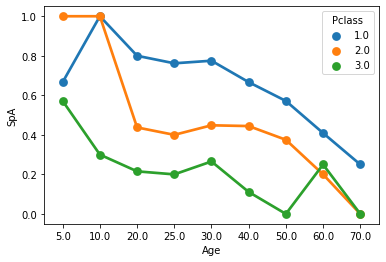

In [34]:
# 3등선실에 대다수의 승객이 탑승했으나, 비율상으로도 많은 수의 사람이 사망함.
# 그리고 1등선실은 사람들의 나이가 대체로 많았음 -> 돈이 많은사람은 나이가 많은사람이 많았다.

# 결론 : Pclass 는  모델에 넣을 중요한 지표가 된다.




# grid = sns.FacetGrid(result)
# grid.map(sns.pointplot,'Age','SpA','Pclass')
# grid.add_legend()
lm = sns.pointplot(x='Age',y='SpA',hue='Pclass',data=result)

C:\Python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Python39\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


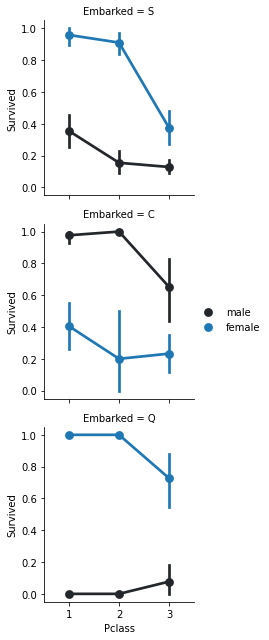

In [255]:
# 남자와 여자의 생존률이 각 등급별 객실별 선실에 따라 달라질까??

# 남자와 여자는 두가지로 나뉘어지니 점도표로 만들어보자.
# seaborn 안에 있는 facetGrid 를 사용해보자
grid = sns.FacetGrid(train,row='Embarked') # col은 필요없음.
grid.map(sns.pointplot,'Pclass','Survived','Sex') #(사용할 함수 , 가로 , 세로, 나누는 기ㅜㅈㄴ)
grid.add_legend()


C:\Python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


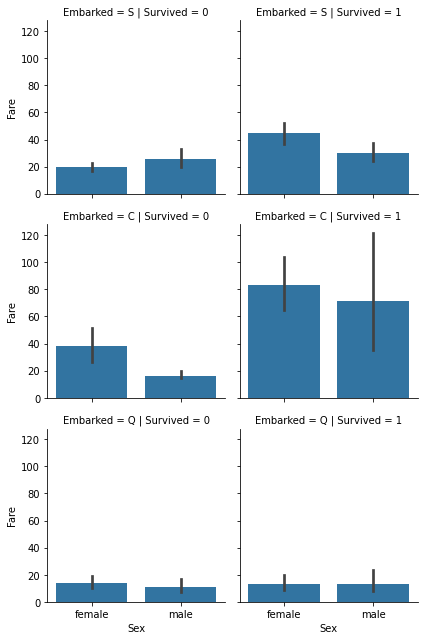

In [256]:
# 남자가 검은색 , 여자가 파란색 /// C에서 탑승 승객 빼고는 여성이 더 높은 생존률을 보임.
# 이것도 무조건 C 에서 탑승한 사람들은 남성이 생존률이 높다 가 아니라, 객실등급과 승선지의 관계, 그리고 객실등급과 생존률 사이 관계가 겹쳐서 다음과 같은결과가 나옴.(might...아마도...?)

# 시각화 작업의 마무리로, 범주형 데이터와 숫자 데이터의 상관관계 정리.
# 승선지와 성별 <--> 요금 <--> 생존률 의 관계

# HOW?
# 1. 그래프 그리기 좌측 우측을 생존자로 나누기
# 2. 위에서부터 승선지로 나누면 2*3 = 6개의 그래프가 그려짐
# 3. 세부적으로 성별에 따른 요금평균 구하기
# 4. 3) 에서 요금평균을 구하면 남성/여성 으로 두개가 나오니, 뚱뚱한 막대기 모양인 barplot 사용.

# ci = none 신뢰구간 적용하지 않음, confidence intervals
grid = sns.FacetGrid(train,col='Survived',row='Embarked')

# 큰 틀을 짰으니 세부적 그래프 그리기
grid.map(sns.barplot,'Sex','Fare')



In [257]:
# 위 자료에서 나온 그래프는, 사망자/생존자로 나눈 후, 사망자 내에서 성별 별 지불요금 평균이다. 따라서 S,Q,C 어디서든 생존한 사람은 높은 요금을 냈을 확률이 높다는 뜻임.


In [258]:
"""
정리

머신러닝 모델에 넣을 항목들
# 요금 (묶어서)
# 성별
# 객실등급
# 승선지
# 나이 ( 그룹화 )
# SibSp,Parch 묶어서 (Sibling , Spouses : 형제자매,배우자 // Parents, Children : 부모 자식 )

"""

In [118]:
#  데이터 정제
#  이제 진짜 모델링 시작

#  티켓과 Cabin 을 훈련, 테스트에서 모두 없애버리기
train = train.drop(['Ticket','Cabin'],axis=1)

test = test.drop(['Ticket','Cabin'],axis=1)

In [119]:
combine = [train,test]

In [120]:
train.info()
test.info() #확인해보니 확실히 column 수가 줄어들었음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex      

In [122]:
"""
탑승객들의 이름을 보니 Mr. 와 Miss 등을 통해 이름으로도 충분히 의미있는 데이터를 뽑아낼 수 있을것
또한 배와 관련된 소령 중령 함장 등과같은 직함들도 있음.
"""

'\n탑승객들의 이름을 보니 Mr. 와 Miss 등을 통해 이름으로도 충분히 의미있는 데이터를 뽑아낼 수 있을것\n또한 배와 관련된 소령 중령 함장 등과같은 직함들도 있음.\n'

In [125]:
train.describe(include='O')

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Watson, Mr. Ennis Hastings",male,S
freq,1,577,644


In [126]:
"""
동명이인은 없음. 하지만 타이틀로 묶으면 아마 있을듯 함
test 와 train set 을 Combine 이라는 이름으로 묶어보자
"""

'\n동명이인은 없음. 하지만 타이틀로 묶으면 아마 있을듯 함\ntest 와 train set 을 Combine 이라는 이름으로 묶어보자\n'

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    # 데이터셋에 있는 Name 에서 str을 추출(extract)해서 그중 A-Za-z 모두 가져온다.